# Active credit card holders

## Aim

The aim of the project is to perform a segmentation analysis and communicate any findings and recommendations I have to help improve marketing strategies for the Credit Card Company. 

## Data

<b>CUSTID</b>	Identification of credit card holder <br>
<b>BALANCE</b>	Balance amount left in the account to make purchases <br>
<b>BALANCE_FREQUENCY</b>
Frequency with which balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
<b>PURCHASES</b>
Value of purchases made from account <br>
<b>ONE_OFF_PURCHASES</b>
Maximum purchase done in one-go <br>
<b>INSTALLMENTS_PURCHASES</b>
Value of purchases done in installments <br>
<b>CASH_ADVANCE</b>
Value of cash in advance given to user <br>
<b>PURCHASES_FREQUENCY</b>
Frequency of purchases, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) <br>
<b>ONE_OFF_PURCHASES_FREQUENCY</b>
Frequency of purchases in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
<b>PURCHASES_INSTALLMENTS_FREQUENCY</b>
Frequency of purchases in installments (1 = frequently done, 0 = not frequently done)<br>
<b>CASH_ADVANCE_FREQUENCY</b>
Frequency of cash in advance being paid (1 = frequently done, 0 = not frequently done)<br>
<b>CASH_ADVANCE_TRX</b>
Number of transactions made with cash in advance<br>
<b>PURCHASES_TRX</b>
Number of purchase transactions made<br>
<b>CREDIT_LIMIT</b>
Limit of credit for user<br>
<b>PAYMENTS</b>
Amount of payment made by user<br>
<b>TENURE</b>
Tenure of credit card service for user<br>

## Import Packages

In [19]:
# For Data Manipulation
import pandas as pd
# numpy gives us access to some useful data structures
import numpy as np
# Seaborn is another visualisation library
import seaborn as sns
# matplotlib allows us to do basic plots
import matplotlib.pyplot as plt
# Import a scalar
from sklearn.preprocessing import scale
# Bring in k-means
from sklearn.cluster import KMeans
# Ignore warnings (just for neatness)
from warnings import filterwarnings
filterwarnings("ignore")

## Source Data

In [2]:
df = pd.read_csv('credit_cards.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,NaN,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,12
1,C10002,NaN,0.909091,NaN,0.00,0.0,NaN,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,12


## Explore and Clean Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
CUST_ID                             8950 non-null object
BALANCE                             8860 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8860 non-null float64
ONEOFF_PURCHASES                    8860 non-null float64
INSTALLMENTS_PURCHASES              8682 non-null float64
CASH_ADVANCE                        8682 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8859 non-null float64
PAYMENTS                            8860 non-null float64
TENURE                      

In [4]:
df.describe

<bound method NDFrame.describe of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002          NaN           0.909091        NaN              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
5     C10006  1809.828751           1.000000    1333.28              0.00   
6     C10007   627.260806           1.000000    7091.01           6402.63   
7     C10008  1823.652743           1.000000     436.20              0.00   
8     C10009  1014.926473           1.000000     861.49            661.49   
9     C10010   152.225975           0.545455    1281.60           1281.60   
10    C10011  1293.124939           1.000000     920.12              0.00   
11    C10012   630.794744           0.8181

In [5]:
# Check for duplicates
df.duplicated().sum


<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8920    False
8921    False
8922    False
8923    False
8924    False
8925    False
8926    False
8927    False
8928    False
8929    False
8930    False
8931    False
8932    False
8933    False
8934    False
8935    False
8936    False
8937    False
8938    False
8939    False
8940    False
8941    False
8942    False
8943    False
8944    False
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool>

In [6]:
# Drop customer ID as not required for analysis
df_cluster = df.drop('CUST_ID', axis = 1)

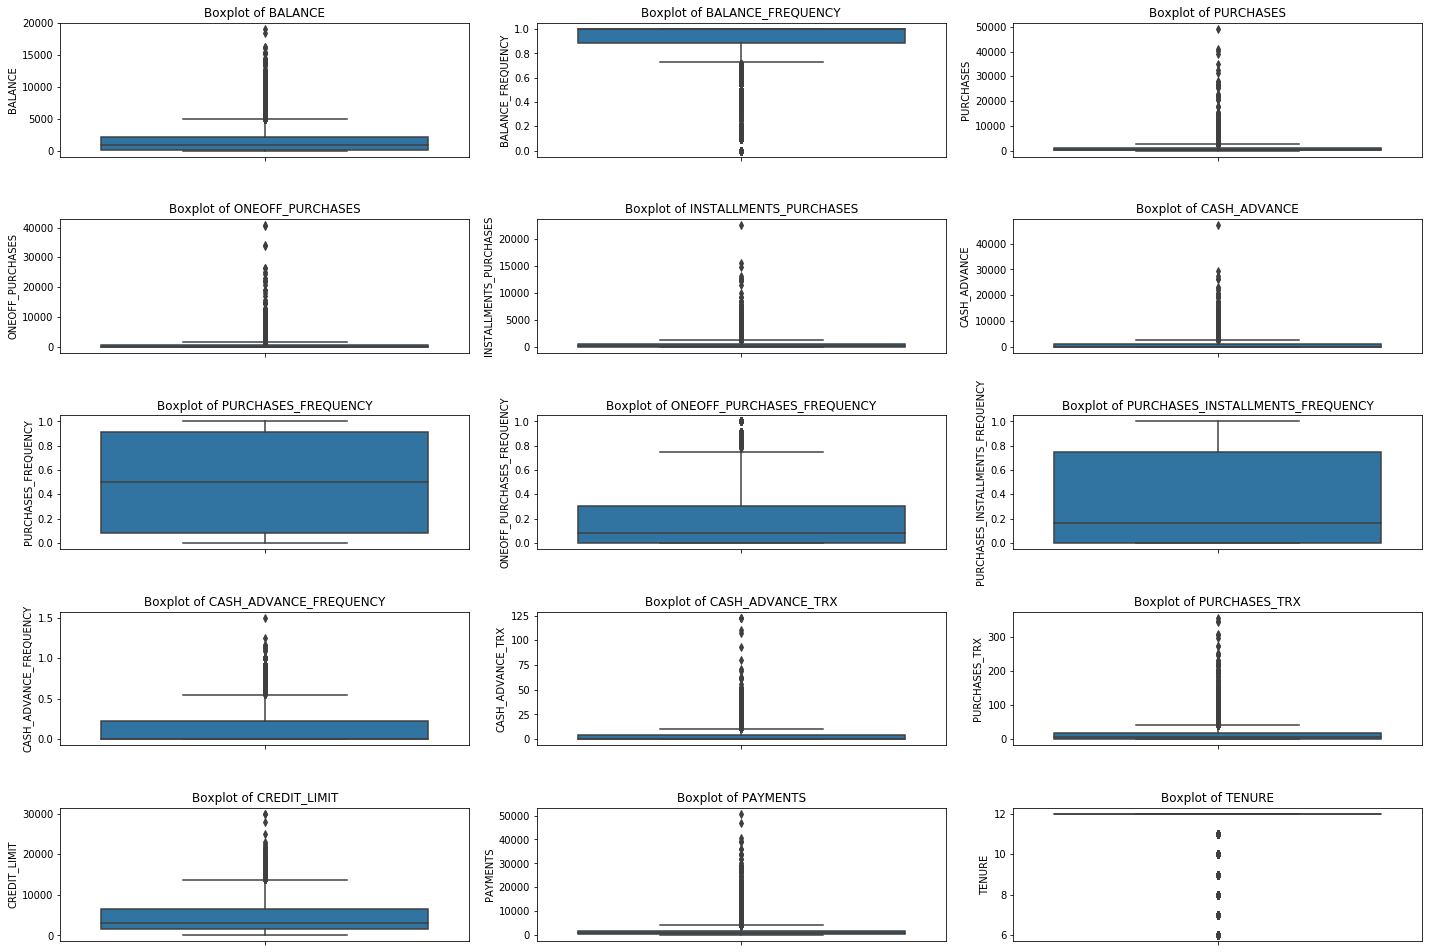

In [7]:
# Check for Outliers in Data
plt.figure(figsize = (20,16))
Features = df_cluster.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = df_cluster[Features[i]], data = df_cluster)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

## Initial Observations 

1. There are 8950 rows
2. There are missing values from Balance, Purchases, One off Purchases, Installments Purchases, Cash_advance, Purchases_TRX, Credit Limit and Tenure. A lot of these seem to be NaN so can be changed to 0.
3. There are outliers in all features apart from purchases_frequency and purchases_installments_frequency


## Cleaning Data Ready For Clustering Analysis

## Remove Outliers

This is an important step as K-Means Clustering Algorithms can be sensitive to Outliers

In [8]:
# Function to get all columns with data far away from the lower and upper quartile
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [10]:
# For each feature go through and remove data that is outside of the given parameters
Feature_list = df_cluster.columns
for i in Feature_list:
    lr, ur = detect_outliers(df_cluster[i])
    df_cluster[i] = np.where(df_cluster[i] > ur, ur,df_cluster[i])
    df_cluster[i] = np.where(df_cluster[i] < lr, lr,df_cluster[i])

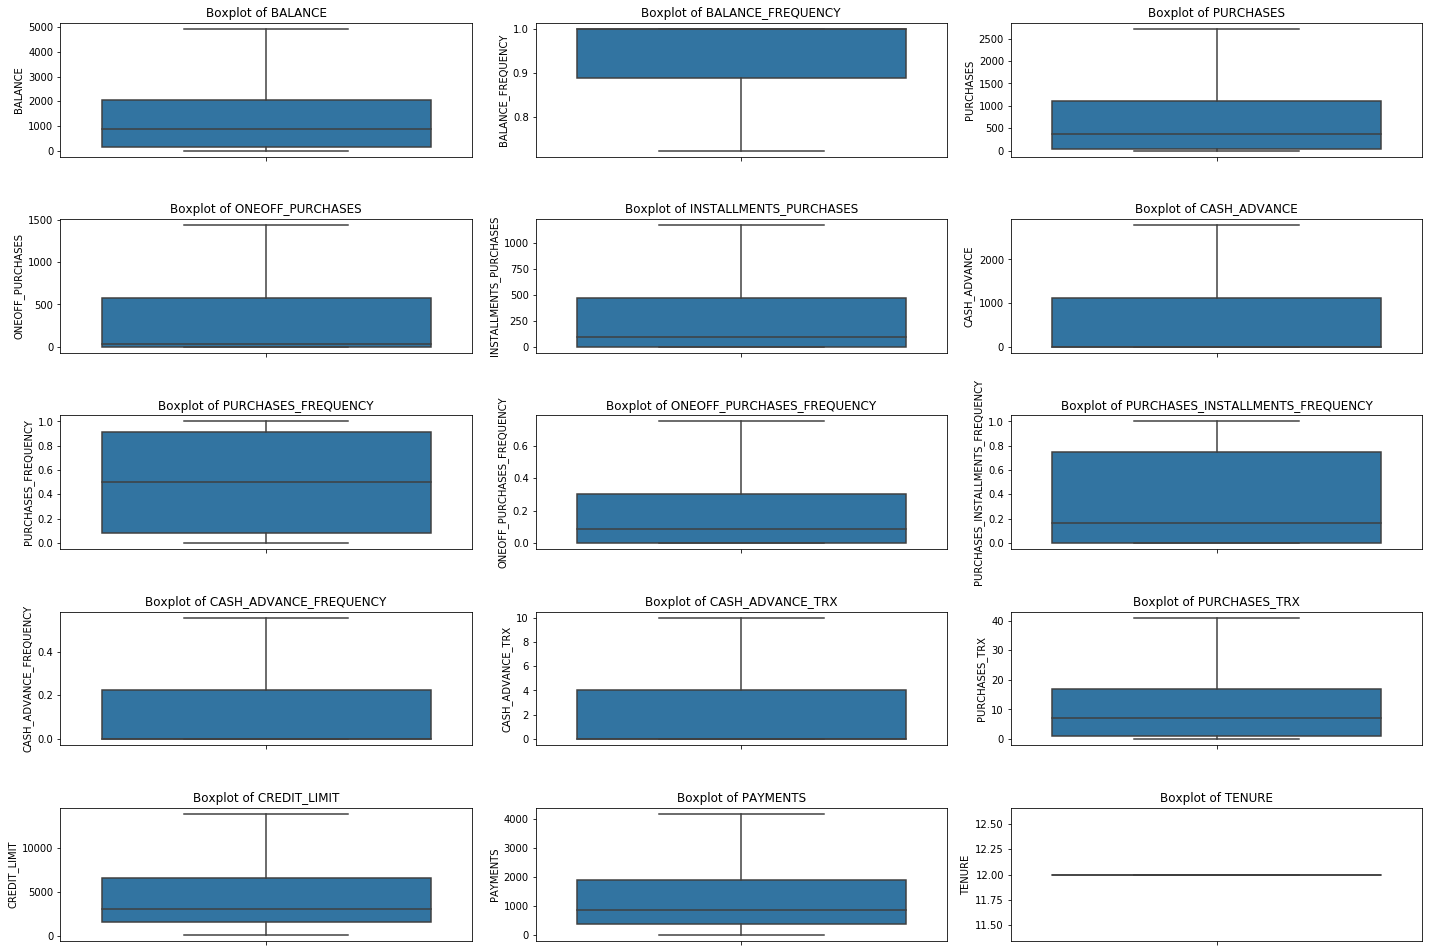

In [12]:
#Check all outliers have been removed
plt.figure(figsize = (20,16))
Features = df_cluster.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = df_cluster[Features[i]], data = df_cluster)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [16]:
# Drop all NA values, there is enough data in the dataset to be able to drop all nulls.
df_cluster.dropna(inplace=True)
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8003 entries, 2 to 8949
Data columns (total 15 columns):
BALANCE                             8003 non-null float64
BALANCE_FREQUENCY                   8003 non-null float64
PURCHASES                           8003 non-null float64
ONEOFF_PURCHASES                    8003 non-null float64
INSTALLMENTS_PURCHASES              8003 non-null float64
CASH_ADVANCE                        8003 non-null float64
PURCHASES_FREQUENCY                 8003 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8003 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8003 non-null float64
CASH_ADVANCE_FREQUENCY              8003 non-null float64
CASH_ADVANCE_TRX                    8003 non-null float64
PURCHASES_TRX                       8003 non-null float64
CREDIT_LIMIT                        8003 non-null float64
PAYMENTS                            8003 non-null float64
TENURE                              8003 non-null float64
dtypes: float64(15)
mem

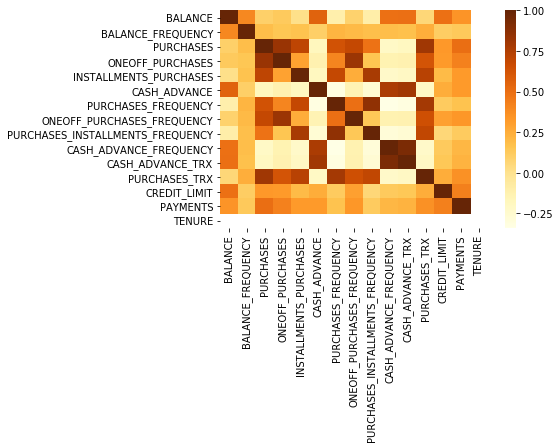

In [17]:
# Review correlations between cleaned dataset
sns.heatmap(df_cluster.corr(),cmap="YlOrBr")

## Clustering Analysis

In [20]:
# Scale data
scaled_data_1 = scale(df_cluster)

Text(0.5, 1.0, 'Elbow test')

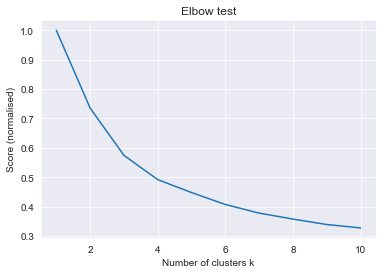

In [21]:
# Elbow method to determine optimal number of clusters

num_clusters = [1,2,3,4,5,6,7,8,9,10]

# create a kmeans model for each value of k
kmeans_list = [KMeans(n_clusters = i) for i in num_clusters]

# For each value of k, fit the model with our data and use the "inertia" method of KMeans to compute the WSS
scores = [kmeans_list[i-1].fit(scaled_data_1).inertia_ for i in num_clusters]

# Normalise the scores with respect to the score for k=1 (the highest score)
scores_normalised = [score/scores[0] for score in scores]

# Plot the test
sns.set_style('darkgrid')
sns.lineplot(num_clusters, scores_normalised)
plt.xlabel("Number of clusters k")
plt.ylabel("Score (normalised)")
plt.title("Elbow test")

The elbow test looks to show and optimal number of clusters at around 3 or 4. For this cluster analysis I will pick k=3.

In [23]:
# Create the model
model = KMeans(n_clusters = 3, random_state= 123)
# Fit the model to our data
model.fit(scaled_data_1)
# Save the results as a new column in our data
df_cluster['cluster_1'] = model.labels_

In [28]:
df_out = df_cluster.groupby(by = 'cluster_1').sum()
df_out.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,TENURE
cluster_1,,,,,,,,,,,,,,,
0,2.591803e+06,3739.791279,1.627685e+06,7.242984e+05,857455.53,7.043821e+05,1904.261962,428.338868,1440.937783,177.702646,2775.0,30677.0,1.281199e+07,2.922548e+06,49992.0
1,5.353694e+06,1919.498982,4.367119e+05,2.736448e+05,143629.60,3.963505e+06,355.687291,154.066432,207.406577,700.535052,13779.0,6729.0,1.071642e+07,3.525475e+06,24048.0
2,3.167887e+06,1793.980553,3.834234e+06,1.830307e+06,1367510.20,7.298531e+05,1669.502164,899.386749,1276.677851,132.122962,2551.0,55974.0,1.186198e+07,4.394445e+06,21996.0


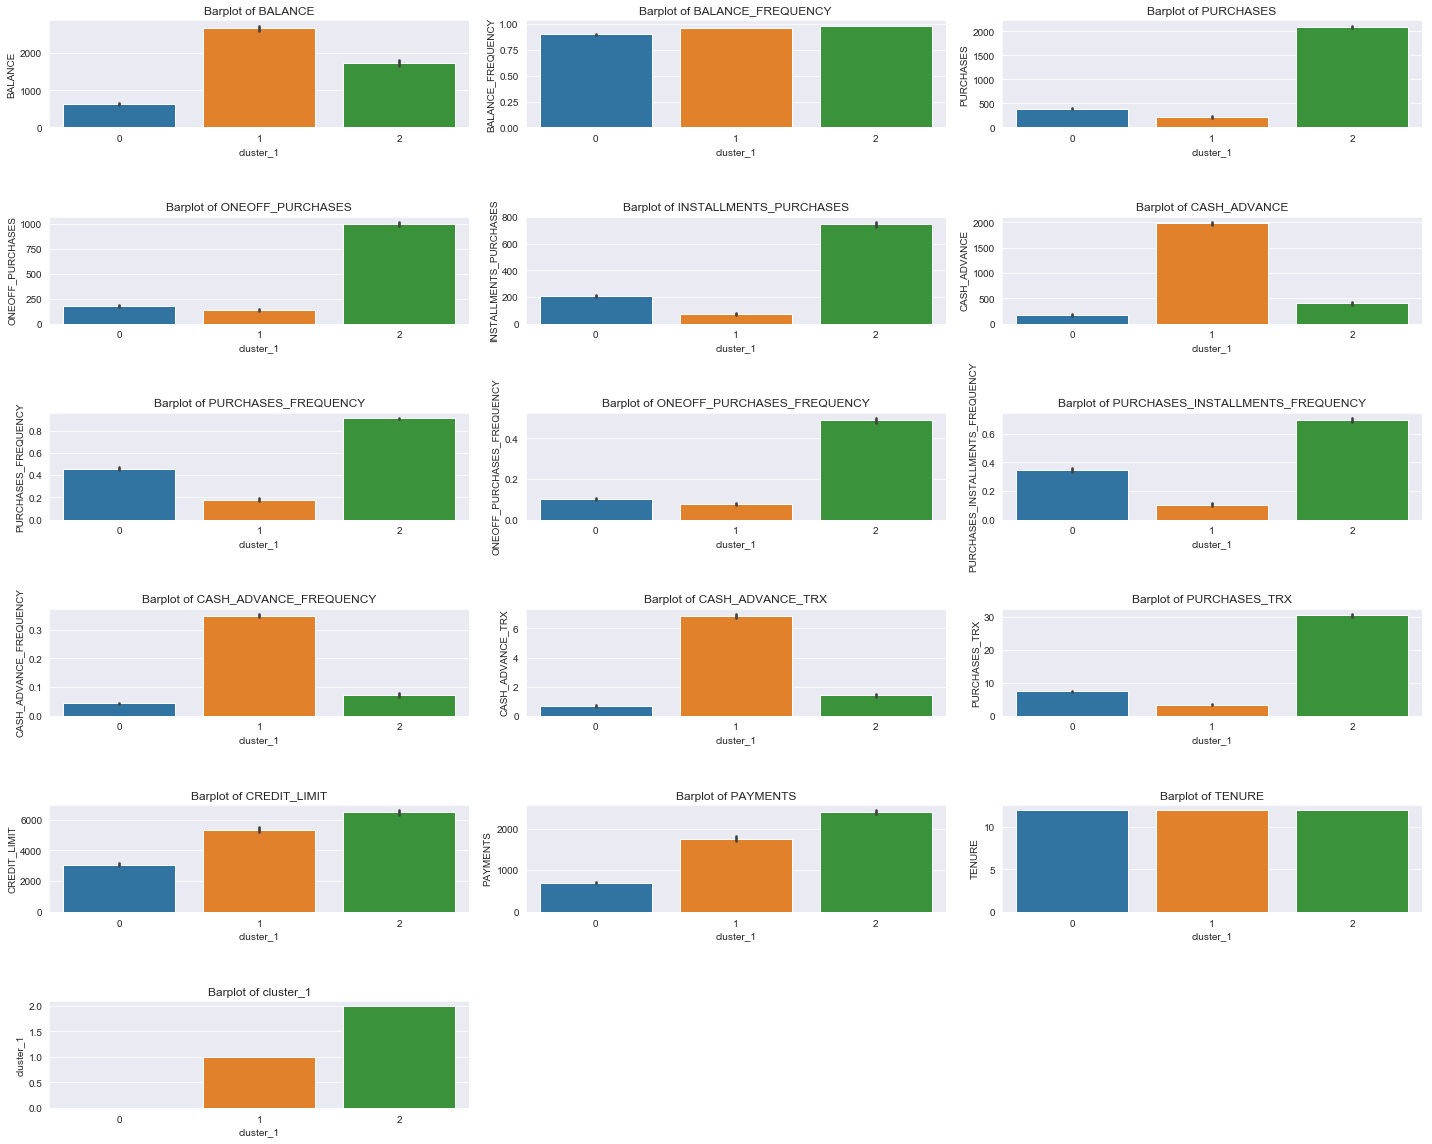

In [42]:
plt.figure(figsize = (20,16))
Features = df_cluster.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.barplot(y = df_cluster[Features[i]], x = "cluster_1",  data = df_cluster)
    plt.title(f"Barplot of {Features[i]}")
    plt.tight_layout()

## Summary

### Key Characteristics 

<b>Cluster 0</b> is low balance (but low credit limit), mid purhcase frequency and low payments. <br>
<b>Cluster 1</b> is high balance, low purchase, high cash advance, , mid credit limit <br>
<b>Cluster 2</b> is mid balance, high credit limit, high purchase, high payments <br> 

### Naming the Clusters based off of Characteristics

<b>Cluster 0</b> Little but Often Users <br>
<b>Cluster 1</b> Cash Advance Users<br>
<b>Cluster 2</b> High Value Frequent Users

### Targeting Strategies 

<b>Cluster 0</b> Potential to upsell smaller scale users to larger scale <br>
<b>Cluster 1</b> Target with any Cash Advance Products <br>
<b>Cluster 2</b> Target with higher end Products